<a href="https://colab.research.google.com/github/iam-fern/Gen_datanew/blob/main/gendatanew_1000rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
%matplotlib inline
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# random.uniform(a, b)
# Syntax : numpy.random.uniform(low=0.0, high=1.0, size=None)
# a : Required. A number specifying the lowest possible outcome
# b : Required. A number specifying the highest possible outcome

data = pd.DataFrame({'X1' : np.random.uniform(20, 100, 50000),
                     'X2' : np.random.uniform(20, 100, 50000),
                     'X3' : np.random.uniform(20, 100, 50000)})
data

,X1,X2,X3
0,76.249893,68.655144,66.304819
1,56.202743,49.112790,20.060887
2,48.104050,33.635593,36.792001
3,66.740505,39.103807,25.985712
4,52.256339,43.121843,48.391270
...,...,...,...
49995,34.589775,72.253869,28.476215
49996,93.574476,85.307602,73.935580
49997,61.908163,64.027998,36.959761
49998,96.556862,28.819735,70.109687


In [21]:
X1 = data['X1']
X2 = data['X2']
X3 = data['X3']

x1 = X1
x2 = X2
x3 = X3

new_data = pd.DataFrame({'x1' : data['X1'],
                         'x2' : data['X2'],
                         'x3' : data['X3'],
                         'e'  : np.random.normal(0, x1**4, 50000)})

n=250
rep=0
table_data_all=pd.DataFrame({"rep":[]})
data_copy=new_data.copy()
while not data_copy.empty:
    #=========================
    if data_copy.shape[0]>n:
        index=data_copy.sample(n).index
        data_new=data_copy.loc[index,:].reset_index(drop=True)
        data_copy=data_copy.drop(index)
    else:
        data_new=data_copy.copy().reset_index(drop=True)
        data_copy=pd.DataFrame({"":[]})
    #=========================

    table_data = pd.DataFrame({'x1' : data_new['x1'],
                               'x2' : data_new['x2'],
                               'x3' : data_new['x3'],
                               'e'  : data_new['e']})
  

    table_data['Y'] = 10 + table_data['x1'] + table_data['x2'] + table_data['x3'] + table_data['e']
    
    table_data=table_data.reset_index(drop=True).reset_index()
    table_data["rep"]=rep
    table_data_all=pd.concat([table_data_all,table_data],axis=0,ignore_index=True,sort=False)
    rep+=1
    if rep==1000:
      break
table_data_all=table_data_all.set_index(["rep","index"])
table_data_all

x1         x2         x3             e             Y
rep   index                                                             
0.0   0.0    48.532802  34.681108  28.624860  3.174822e+06  3.174944e+06
      1.0    49.110158  69.580941  72.705681 -1.506056e+06 -1.505855e+06
      2.0    61.695364  97.327732  94.744239  3.530957e+07  3.530984e+07
      3.0    37.097793  31.273249  46.829450 -3.831634e+06 -3.831509e+06
      4.0    46.018953  84.208119  54.616485  4.201788e+06  4.201983e+06
...                ...        ...        ...           ...           ...
199.0 245.0  63.230006  39.282986  94.445184 -1.743360e+07 -1.743340e+07
      246.0  82.711417  82.769150  83.047722 -5.146343e+06 -5.146084e+06
      247.0  63.622174  50.162690  88.740962 -2.649819e+07 -2.649798e+07
      248.0  57.560713  27.622518  84.406851  2.381304e+07  2.381322e+07
      249.0  95.366571  62.640121  46.654335  9.330773e+07  9.330795e+07

[50000 rows x 5 columns]

In [22]:
x = table_data_all[['x1', 'x2', 'x3',]]
y = table_data_all['Y']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

table_data_new = pd.DataFrame({'x1'    : table_data_all['x1'],
                               'x2'    : table_data_all['x2'],
                               'x3'    : table_data_all['x3'],
                               'e'     : table_data_all['e'],
                               'Y'     : df['Actual'],
                               'y_hat' : df['Predicted']})
table_data_new['e_hat'] = table_data_new['Y']-table_data_new['y_hat']
table_data_new

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    48.532802  34.681108  ...  9.278052e+05  2.247138e+06
      1.0    49.110158  69.580941  ... -3.979841e+05 -1.107871e+06
      2.0    61.695364  97.327732  ... -1.240468e+06  3.655030e+07
      3.0    37.097793  31.273249  ...  6.407626e+05 -4.472272e+06
      4.0    46.018953  84.208119  ... -1.626277e+05  4.364611e+06
...                ...        ...  ...           ...           ...
199.0 245.0  63.230006  39.282986  ... -5.932022e+05 -1.684019e+07
      246.0  82.711417  82.769150  ... -9.404837e+05 -4.205601e+06
      247.0  63.622174  50.162690  ... -5.962279e+05 -2.590175e+07
      248.0  57.560713  27.622518  ... -2.207245e+05  2.403394e+07
      249.0  95.366571  62.640121  ... -1.188609e+04  9.331983e+07

[50000 rows x 7 columns]

In [23]:
table_data_new.to_csv('gendatanew_n250_x4_1000rep.csv')
files.download('gendatanew_n250_x4_1000rep.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

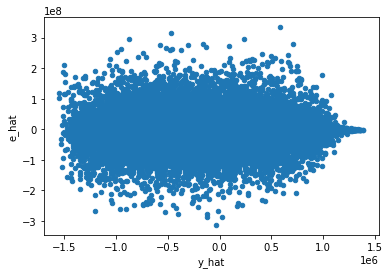

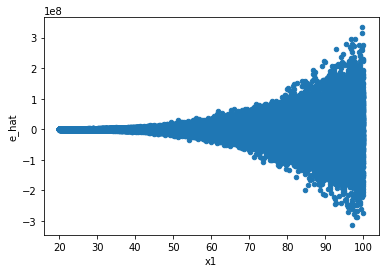

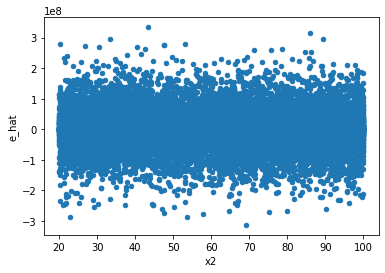

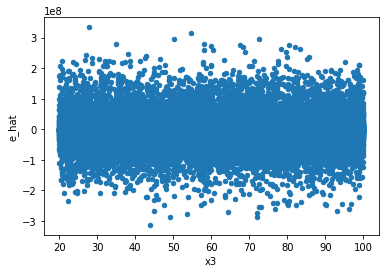

In [24]:
table_data_new.plot(x ='y_hat', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='x1', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='x2', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='x3', y='e_hat', kind = 'scatter')